In [2]:
input_size = 784
output_size = 784 
hidden1 = 256      
hidden2 = 128
hidden3 = 64
bottle = 2
weight_bit_width = 8
act_bit_width = 8

In [1]:
import torch
import torch.nn as nn
import torch.utils.data as data
import torchvision
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision.transforms import transforms
import numpy as np
import torchvision.utils as vutils
import PIL.Image as Image
from torch import nn
from torch.nn import Module
import torch.nn.functional as F
from brevitas.nn import QuantLinear, QuantReLU
import brevitas.nn as qnn
# Model structure
class Encoder(nn.Module):
    def __init__(self):
        super(Encoder, self).__init__()
        # Encoder
        self.encoder = nn.Sequential(
            QuantLinear(784, 256,bias=True, weight_bit_width=weight_bit_width ),
            nn.Tanh(),
            QuantLinear(256, 128,bias=True, weight_bit_width=weight_bit_width ),
            nn.Tanh(),
            QuantLinear(128, 64,bias=True, weight_bit_width=weight_bit_width ),
            nn.Tanh(),
            QuantLinear(64, 2,bias=True, weight_bit_width=weight_bit_width ),
            nn.Tanh()
        )
    def forward(self, inputs):
        codes = self.encoder(inputs)
        return codes
class Decoder(nn.Module):
    def __init__(self):
        super(Decoder, self).__init__()
        # Decoder
        self.decoder = nn.Sequential(
            QuantLinear(2, 64,bias=True, weight_bit_width=weight_bit_width),
            nn.Tanh(),
            QuantLinear(64, 128,bias=True, weight_bit_width=weight_bit_width ),
            nn.Tanh(),
            QuantLinear(128, 256,bias=True, weight_bit_width=weight_bit_width ),
            nn.Tanh(),
            QuantLinear(256, 784,bias=True, weight_bit_width=weight_bit_width ),
            nn.Sigmoid()
        )
    def forward(self, inputs):
        outputs = self.decoder(inputs)
        return outputs
class AutoEncoder(nn.Module):
    def __init__(self):
        super(AutoEncoder, self).__init__()
        # Encoder
        self.encoder = Encoder()
        # Decoder
        self.decoder = Decoder()
    def forward(self, inputs):
        codes = self.encoder(inputs)
        decoded = self.decoder(codes)
        return codes, decoded

In [2]:
model_ae = AutoEncoder()
print(model_ae)

NameError: name 'weight_bit_width' is not defined

In [28]:

import torch
import torch.nn as nn
import torch.utils.data as data
import torchvision
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision.transforms import transforms
import numpy as np
import torchvision.utils as vutils
import PIL.Image as Image
from torch import nn
from torch.nn import Module
import torch.nn.functional as F
from brevitas.nn import QuantLinear, QuantReLU  
import brevitas.nn as qnn
from brevitas.core.quant import QuantType

model = nn.Sequential(
            QuantLinear(input_size, hidden1, bias=True, weight_bit_width=weight_bit_width ),
            qnn.QuantReLU(bit_width=act_bit_width),
            QuantLinear(hidden1, hidden2, bias=True, weight_bit_width=weight_bit_width  ),
            qnn.QuantReLU(bit_width=act_bit_width),
            QuantLinear(hidden2, hidden3, bias=True, weight_bit_width=weight_bit_width ),
            qnn.QuantReLU(bit_width=act_bit_width),
            QuantLinear(hidden3, bottle, bias=True, weight_bit_width=weight_bit_width ),
            qnn.QuantReLU(bit_width=act_bit_width),
            QuantLinear(bottle, hidden3,bias=True, weight_bit_width=weight_bit_width),
            qnn.QuantReLU(bit_width=act_bit_width),
            QuantLinear(hidden3, hidden2,bias=True, weight_bit_width=weight_bit_width ),
            qnn.QuantReLU(bit_width=act_bit_width),
            QuantLinear(hidden2, hidden1,bias=True, weight_bit_width=weight_bit_width ),
            qnn.QuantReLU(bit_width=act_bit_width),
            QuantLinear(hidden1, output_size,bias=True, weight_bit_width=weight_bit_width ),
            qnn.QuantReLU(quant_type=QuantType.INT, bit_width=weight_bit_width , min_val=0, max_val=255),
)



From Now Up
======

In [72]:
input_size = 400
output_size = 400 
hidden1 = 128      
hidden2 = 64
hidden3 = 32
bottle = 2
weight_bit_width = 8
act_bit_width = 8

In [73]:
import torch
import torch.nn as nn
import torch.utils.data as data
import torchvision
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision.transforms import transforms
import numpy as np
import torchvision.utils as vutils
import PIL.Image as Image
from torch import nn
from torch.nn import Module
import torch.nn.functional as F
from brevitas.nn import QuantLinear, QuantReLU  
import brevitas.nn as qnn
from brevitas.core.quant import QuantType

model = nn.Sequential(
            QuantLinear(input_size, hidden1, bias=True, weight_bit_width=weight_bit_width ),
            qnn.QuantReLU(bit_width=act_bit_width),
            QuantLinear(hidden1, hidden3, bias=True, weight_bit_width=weight_bit_width  ),
            qnn.QuantReLU(bit_width=act_bit_width),
           # QuantLinear(hidden2, hidden3, bias=True, weight_bit_width=weight_bit_width ),
           # qnn.QuantReLU(bit_width=act_bit_width),
           # QuantLinear(hidden3, hidden2,bias=True, weight_bit_width=weight_bit_width ),
           # qnn.QuantReLU(bit_width=act_bit_width),
            QuantLinear(hidden3, hidden1,bias=True, weight_bit_width=weight_bit_width ),
            qnn.QuantReLU(bit_width=act_bit_width),
            QuantLinear(hidden1, output_size,bias=True, weight_bit_width=weight_bit_width ),
            qnn.QuantReLU(quant_type=QuantType.INT, bit_width=weight_bit_width , min_val=0, max_val=255)
            #qnn.QuantIdentity(quant_type=QuantType.FP, bit_width=weight_bit_width , min_val=0, max_val=1),
)


In [74]:
model

Sequential(
  (0): QuantLinear(
    in_features=400, out_features=128, bias=True
    (input_quant): ActQuantProxyFromInjector(
      (_zero_hw_sentinel): StatelessBuffer()
    )
    (output_quant): ActQuantProxyFromInjector(
      (_zero_hw_sentinel): StatelessBuffer()
    )
    (weight_quant): WeightQuantProxyFromInjector(
      (_zero_hw_sentinel): StatelessBuffer()
      (tensor_quant): RescalingIntQuant(
        (int_quant): IntQuant(
          (float_to_int_impl): RoundSte()
          (tensor_clamp_impl): TensorClampSte()
          (delay_wrapper): DelayWrapper(
            (delay_impl): _NoDelay()
          )
        )
        (scaling_impl): StatsFromParameterScaling(
          (parameter_list_stats): _ParameterListStats(
            (first_tracked_param): _ViewParameterWrapper(
              (view_shape_impl): OverTensorView()
            )
            (stats): _Stats(
              (stats_impl): AbsMax()
            )
          )
          (stats_scaling_impl): _StatsScaling(


In [75]:
import torch
from torchvision import transforms, datasets
import os, sys
from torch.utils.data import Dataset, DataLoader
from PIL import Image
import numpy as np


class my_dataset(Dataset):
    def __init__(self, img_path, data_transform = None):
        self.img_path = img_path
        self.transforms = data_transform
        self.img_list = []
        
        for file in os.listdir(self.img_path):
            img_path = os.path.join(self.img_path, file)
            self.img_list.append(img_path)
    def __getitem__(self, item):
        img = Image.open(self.img_list[item]).convert('RGB')
        img = img.resize((20,20), Image.ANTIALIAS)
        img_np = np.array(img)
        
        if self.transforms is not None:
            img = self.transforms(img_np)
        
        return img
    def __len__(self):
        return len(self.img_list)
    
data_transform = transforms.Compose([
    transforms.ToPILImage(),
    transforms.ToTensor(),
])

img_path = 'bottle/train/good'
train_dataset = my_dataset(img_path, data_transform)

dataset_loader = DataLoader(train_dataset,
                           batch_size = 1,
                           shuffle = True,
                           num_workers = 1)


[[255. 255. 255. 255. 254. 254. 255. 255. 255. 245. 245. 255. 255. 255.
  254. 254. 255. 255. 255. 255.]
 [255. 255. 255. 253. 255. 255. 202. 136.  99.  88.  92. 109. 150. 211.
  255. 255. 253. 255. 255. 255.]
 [255. 255. 253. 255. 228. 114.  52.  51.  61.  72.  81.  78.  68.  73.
  130. 233. 255. 253. 255. 255.]
 [255. 253. 255. 216.  81.  60.  85.  91.  84.  87.  95. 100. 106.  91.
   71.  93. 219. 255. 254. 255.]
 [254. 254. 235.  89.  79. 100.  83.  63.  56.  52.  54.  59.  72.  86.
   94.  74.  95. 235. 254. 254.]
 [253. 255. 133.  74. 107.  83.  53.  44.  41.  39.  40.  44.  50.  62.
   83. 102.  70. 136. 255. 253.]
 [255. 222.  77. 101.  92.  56.  44.  43.  35.  32.  32.  34.  38.  49.
   63.  96.  95.  75. 220. 255.]
 [255. 164.  78. 107.  72.  46.  43.  32.  34.  34.  33.  32.  32.  42.
   56.  75. 119.  67. 160. 255.]
 [255. 132.  89.  98.  60.  45.  35.  34.  37.  37.  36.  36.  34.  38.
   51.  63. 115.  79. 121. 255.]
 [255. 122.  94.  88.  57.  44.  33.  35.  37.  39.  42

<ipython-input-75-648ab9a0185b>:20: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  img = img.resize((20,20), Image.ANTIALIAS)


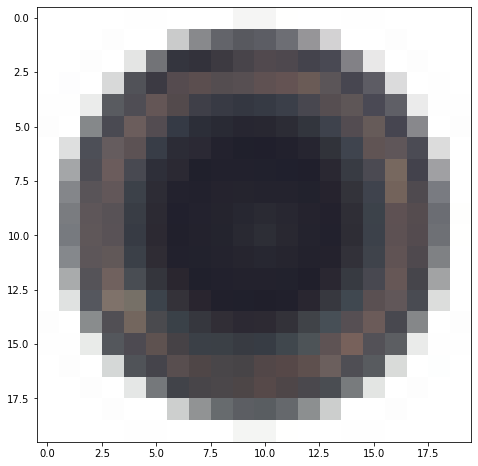

In [76]:
import matplotlib.pyplot as plt
img = train_dataset.__getitem__(0)
img = img.numpy()*255
print(img[0])
img = img.swapaxes(0, 1)
img = img.swapaxes(1, 2)
plt.imshow(img/255)

In [77]:
build_dir = "/workspace/finn"

epochs = 1
batch_size = 64
lr = 0.001
# model_ae = AutoEncoder()
optimizer = torch.optim.Adam(model.parameters(), lr=lr)

loss_function = nn.MSELoss()

#loss_function = nn.BCEWithLogitsLoss()
scheduler = torch.optim.lr_scheduler.MultiStepLR(optimizer, milestones=[10,40], gamma=0.5)

<ipython-input-75-648ab9a0185b>:20: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  img = img.resize((20,20), Image.ANTIALIAS)


Restructured Image by AE


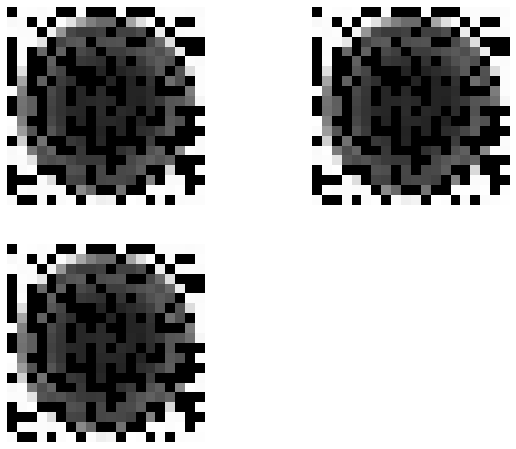

[1/1] Loss: 11124.7294921875
[1/1] Loss: 11124.7294921875


In [78]:
import matplotlib.pyplot as plt
# Settings
plt.rcParams['figure.figsize'] = (10.0, 8.0)
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# Show images
def show_images(images):
    sqrtn = int(np.ceil(np.sqrt(images.shape[0])))
    for index, image in enumerate(images):
        plt.subplot(sqrtn, sqrtn, index+1)
        plt.imshow(image.reshape(20, 20))
        plt.axis('off')

# Train
log_loss=[]
for epoch in range(epochs):
    total_loss = 0
    for idx, data in enumerate(dataset_loader):
        inputs = data.view(-1, 400)*255
        #model_ae.zero_grad()
        model.zero_grad()
        # Forward
        #codes, decoded = model_ae(inputs)
        decoded = model(inputs)
        outputs = decoded.detach().cpu()
        loss = loss_function(decoded, inputs)
        loss.backward()
        optimizer.step()
        total_loss+=loss
        log_loss.append(loss)
        
    print('Restructured Image by AE')
    show_images(outputs/255)
    plt.show()
    total_loss /= len(dataset_loader.dataset)
    scheduler.step()
    
    if epoch % 5 ==0:
        print('[{}/{}] Loss:'.format(epoch+1, epochs), total_loss.item())
print('[{}/{}] Loss:'.format(epoch+1, epochs), total_loss.item())

In [79]:
torch.save(model.state_dict(), build_dir+"/autoencoder_ln.pth")

In [80]:
trained_state_dict = torch.load(build_dir+"/autoencoder_ln.pth")

model.load_state_dict(trained_state_dict, strict=False)

<All keys matched successfully>

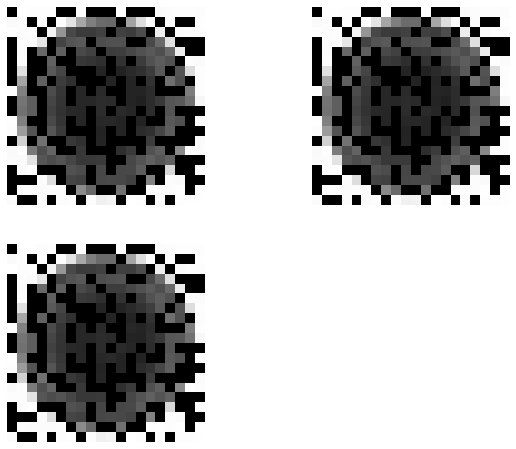

In [81]:
inputs = data.view(-1, 400)*255
show_images(model(inputs).detach().cpu())

In [82]:
model(inputs).detach().cpu()[0]

tensor([  0.0000, 256.6771, 255.6545, 255.6545, 255.6545,   0.0000,   0.0000,
        254.6319,   0.0000,   0.0000,   0.0000, 256.6771,   0.0000,   0.0000,
          0.0000, 253.6093, 254.6319, 255.6545, 255.6545, 254.6319, 252.5867,
        255.6545,   0.0000, 254.6319,   0.0000, 255.6545, 229.0664, 167.7094,
        127.8273, 108.3975, 107.3749,   0.0000, 165.6641, 223.9534, 254.6319,
          0.0000, 254.6319,   0.0000,   0.0000, 256.6771, 256.6771, 254.6319,
        255.6545,   0.0000, 246.4510, 150.3249,  72.6059,  60.3345,  60.3345,
         66.4702,   0.0000,  65.4476,  62.3797,  77.7190,   0.0000, 240.3152,
          0.0000, 253.6093, 254.6319, 255.6545,   0.0000, 254.6319, 254.6319,
        231.1117,   0.0000,  68.5154,  84.8773,  89.9904,   0.0000,  77.7190,
         81.8094,  82.8321,   0.0000,   0.0000,  73.6285, 107.3749, 224.9760,
          0.0000,   0.0000,   0.0000,   0.0000, 254.6319,   0.0000, 105.3297,
          0.0000,  96.1261,   0.0000,  74.6511,  65.4476,   0.00

In [83]:
from copy import deepcopy

modified_model = deepcopy(model)

W_orig = modified_model[0].weight.data.detach().numpy()
W_orig.shape

(128, 400)

In [84]:
model[0]

QuantLinear(
  in_features=400, out_features=128, bias=True
  (input_quant): ActQuantProxyFromInjector(
    (_zero_hw_sentinel): StatelessBuffer()
  )
  (output_quant): ActQuantProxyFromInjector(
    (_zero_hw_sentinel): StatelessBuffer()
  )
  (weight_quant): WeightQuantProxyFromInjector(
    (_zero_hw_sentinel): StatelessBuffer()
    (tensor_quant): RescalingIntQuant(
      (int_quant): IntQuant(
        (float_to_int_impl): RoundSte()
        (tensor_clamp_impl): TensorClampSte()
        (delay_wrapper): DelayWrapper(
          (delay_impl): _NoDelay()
        )
      )
      (scaling_impl): StatsFromParameterScaling(
        (parameter_list_stats): _ParameterListStats(
          (first_tracked_param): _ViewParameterWrapper(
            (view_shape_impl): OverTensorView()
          )
          (stats): _Stats(
            (stats_impl): AbsMax()
          )
        )
        (stats_scaling_impl): _StatsScaling(
          (affine_rescaling): Identity()
          (restrict_clamp_scalin

In [95]:
from brevitas.core.quant import QuantType
from brevitas.nn import QuantIdentity


class AutoencoderForExport(nn.Module):
    def __init__(self, my_pretrained_model):
        super(AutoencoderForExport, self).__init__()
        self.pretrained = my_pretrained_model
        #self.qnt_output = QuantReLU(quant_type=QuantType.INT, bit_width=8, min_val=0, max_val=255)
    
    def forward(self, x):
        # assume x contains bipolar {-1,1} elems
        # shift from {-1,1} -> {0,1} since that is the
        # input range for the trained network
        # x = (x + torch.tensor([1.0])) / 2.0  
        x = x*255
        out = self.pretrained(x)
        #out_original = self.pretrained(x)
        #out = self.qnt_output(out_original)   # output as {-1,1}     
        #return out_final

        #return out_original
        return out
model_for_export = AutoencoderForExport(modified_model)

In [96]:
img_path = 'bottle/test/contamination'
anomaly_data = my_dataset(img_path, data_transform)
print(type(anomaly_data))
dataset_loader = DataLoader(anomaly_data,
                           batch_size = 1,
                           shuffle = True,
                           num_workers = 1)

<class '__main__.my_dataset'>


<ipython-input-75-648ab9a0185b>:20: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  img = img.resize((20,20), Image.ANTIALIAS)


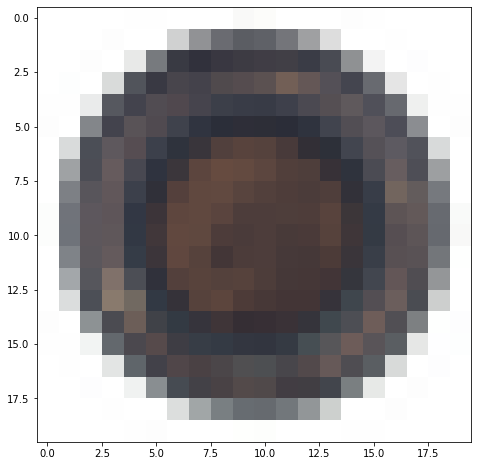

In [97]:
import matplotlib.pyplot as plt
img = anomaly_data.__getitem__(6)
img = img.numpy()
img = img.swapaxes(0, 1)
img = img.swapaxes(1, 2)
plt.imshow(img)

Original Images


<ipython-input-75-648ab9a0185b>:20: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  img = img.resize((20,20), Image.ANTIALIAS)


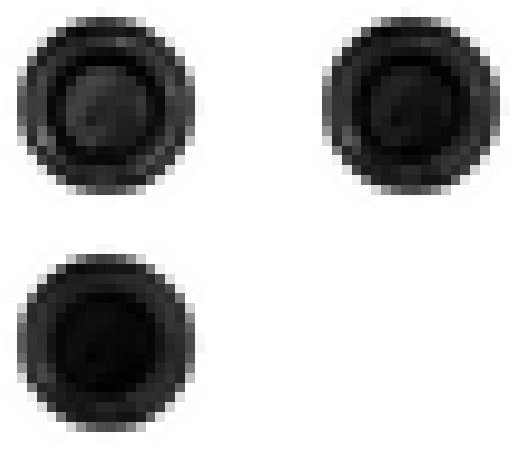

In [98]:
inputs = anomaly_data.__getitem__(6).view(-1, 400)
print('Original Images')
show_images(inputs)
plt.show()

In [99]:
model_for_export

AutoencoderForExport(
  (pretrained): Sequential(
    (0): QuantLinear(
      in_features=400, out_features=128, bias=True
      (input_quant): ActQuantProxyFromInjector(
        (_zero_hw_sentinel): StatelessBuffer()
      )
      (output_quant): ActQuantProxyFromInjector(
        (_zero_hw_sentinel): StatelessBuffer()
      )
      (weight_quant): WeightQuantProxyFromInjector(
        (_zero_hw_sentinel): StatelessBuffer()
        (tensor_quant): RescalingIntQuant(
          (int_quant): IntQuant(
            (float_to_int_impl): RoundSte()
            (tensor_clamp_impl): TensorClampSte()
            (delay_wrapper): DelayWrapper(
              (delay_impl): _NoDelay()
            )
          )
          (scaling_impl): StatsFromParameterScaling(
            (parameter_list_stats): _ParameterListStats(
              (first_tracked_param): _ViewParameterWrapper(
                (view_shape_impl): OverTensorView()
              )
              (stats): _Stats(
                (stats_i

Restructured Image by AE


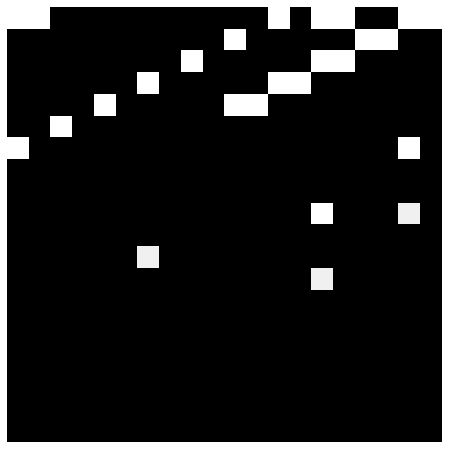

In [100]:
outputs = model_for_export(inputs)
outputs = outputs.detach().cpu()
print('Restructured Image by AE')
show_images(outputs)
plt.show()

In [101]:
outputs = model_for_export(inputs)
outputs = outputs.detach().cpu()
outputs[0]

tensor([0.0000e+00, 4.5646e-41, 0.0000e+00, 4.5646e-41, 1.5461e+34, 3.0925e-41,
        1.5461e+34, 3.0925e-41, 0.0000e+00, 4.5644e-41, 1.5414e-44, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 1.1210e-44, 0.0000e+00, 0.0000e+00, 7.6301e-06,
        0.0000e+00, 0.0000e+00, 1.2612e-44, 0.0000e+00, 0.0000e+00, 4.5644e-41,
        2.1453e+30, 3.0925e-41,        nan,        nan, 0.0000e+00, 0.0000e+00,
               nan,        nan, 0.0000e+00, 0.0000e+00, 1.4013e-45, 0.0000e+00,
        1.0089e-43, 0.0000e+00, 1.5414e-44, 0.0000e+00, 0.0000e+00, 4.5644e-41,
        2.1453e+30, 3.0925e-41, 9.8091e-45, 0.0000e+00, 3.9236e-44, 0.0000e+00,
               nan,        nan, 0.0000e+00, 0.0000e+00, 1.4013e-45, 0.0000e+00,
        2.0179e-43, 0.0000e+00, 1.5414e-44, 0.0000e+00, 0.0000e+00, 4.5644e-41,
        2.1453e+30, 3.0925e-41, 0.0000e+00, 0.0000e+00, 3.9236e-44, 0.0000e+00,
               nan,        nan, 1.4013e-44, 0.0000e+00, 1.4013e-45, 4.5644e-41,
        3.0268e-43, 0.0000e+00, 1.1210e-

In [102]:
import brevitas.onnx as bo
from brevitas.quant_tensor import QuantTensor

ready_model_filename = "autoencoder_ln.onnx"
input_shape = (1, 400)
# create a QuantTensor instance to mark input as bipolar during export
input_a = np.random.randint(0, 255, size=input_shape).astype(np.float32)

scale = 1.0
input_t = torch.from_numpy(input_a * scale)
input_qt = QuantTensor(
    input_t, scale=torch.tensor(scale), bit_width=torch.tensor(8.0), signed=True
)

bo.export_finn_onnx(
    model_for_export, export_path=ready_model_filename, input_t=input_qt
)

print("Model saved to %s" % ready_model_filename)

Model saved to autoencoder_ln.onnx


In [103]:
#import brevitas.onnx as bo

#bo.export_finn_onnx(model, input_shape=(1,400), export_path='autoencoder_ln.onnx')

In [104]:
from finn.util.basic import make_build_dir
from finn.util.visualization import showInNetron

In [105]:
import onnx
from finn.util.test import get_test_model_trained
import brevitas.onnx as bo
from finn.core.modelwrapper import ModelWrapper
from finn.transformation.infer_shapes import InferShapes
from finn.transformation.fold_constants import FoldConstants
from finn.transformation.general import GiveReadableTensorNames, GiveUniqueNodeNames, RemoveStaticGraphInputs

model = ModelWrapper("autoencoder_ln.onnx")
model = model.transform(InferShapes())
model = model.transform(FoldConstants())
model = model.transform(GiveUniqueNodeNames())
model = model.transform(GiveReadableTensorNames())
model = model.transform(RemoveStaticGraphInputs())
model.save("autoencoder_ln_w1a1_tidy.onnx")

In [106]:
showInNetron("autoencoder_ln_w1a1_tidy.onnx")

Serving 'autoencoder_ln_w1a1_tidy.onnx' at http://0.0.0.0:8081


In [107]:
from finn.transformation.streamline import Streamline
from finn.transformation.lower_convs_to_matmul import LowerConvsToMatMul
from finn.transformation.bipolar_to_xnor import ConvertBipolarMatMulToXnorPopcount
import finn.transformation.streamline.absorb as absorb
from finn.transformation.streamline.reorder import MakeMaxPoolNHWC, MoveScalarLinearPastInvariants
from finn.transformation.infer_data_layouts import InferDataLayouts
from finn.transformation.general import RemoveUnusedTensors

model = ModelWrapper("autoencoder_ln_w1a1_tidy.onnx")
model = model.transform(MoveScalarLinearPastInvariants())
model = model.transform(Streamline())
model = model.transform(LowerConvsToMatMul())
model = model.transform(MakeMaxPoolNHWC())
model = model.transform(absorb.AbsorbTransposeIntoMultiThreshold())

model = model.transform(MakeMaxPoolNHWC())
model = model.transform(absorb.AbsorbConsecutiveTransposes())

model = model.transform(ConvertBipolarMatMulToXnorPopcount())
model = model.transform(Streamline())
# absorb final add-mul nodes into TopK
model = model.transform(absorb.AbsorbScalarMulAddIntoTopK())
model = model.transform(InferDataLayouts())
model = model.transform(RemoveUnusedTensors())
model.save("autoencoder_ln_w1a1_streamlined.onnx")

/workspace/finn-base/src/finn/transformation/infer_data_layouts.py:124: UserWarning: Assuming 2D input is NC
  warnings.warn("Assuming 2D input is NC")


In [108]:
showInNetron("autoencoder_ln_w1a1_streamlined.onnx")

Stopping http://0.0.0.0:8081
Serving 'autoencoder_ln_w1a1_streamlined.onnx' at http://0.0.0.0:8081


In [109]:
import finn.transformation.fpgadataflow.convert_to_hls_layers as to_hls
from finn.transformation.fpgadataflow.create_dataflow_partition import (
    CreateDataflowPartition,
)
from finn.transformation.move_reshape import RemoveCNVtoFCFlatten
from finn.custom_op.registry import getCustomOp
from finn.transformation.infer_data_layouts import InferDataLayouts

# choose the memory mode for the MVTU units, decoupled or const
mem_mode = "decoupled"

model = ModelWrapper("autoencoder_ln_w1a1_streamlined.onnx")
model = model.transform(to_hls.InferBinaryStreamingFCLayer(mem_mode))
model = model.transform(to_hls.InferQuantizedStreamingFCLayer(mem_mode))
# TopK to LabelSelect
model = model.transform(to_hls.InferLabelSelectLayer())
# input quantization (if any) to standalone thresholding
model = model.transform(to_hls.InferThresholdingLayer())
model = model.transform(to_hls.InferConvInpGen())
model = model.transform(to_hls.InferStreamingMaxPool())
# get rid of Reshape(-1, 1) operation between hlslib nodes
model = model.transform(RemoveCNVtoFCFlatten())
# get rid of Tranpose -> Tranpose identity seq
model = model.transform(absorb.AbsorbConsecutiveTransposes())
# infer tensor data layouts
model = model.transform(InferDataLayouts())

model.save("autoencoder_ttt.onnx")

In [110]:
showInNetron("autoencoder_ttt.onnx")

Stopping http://0.0.0.0:8081
Serving 'autoencoder_ttt.onnx' at http://0.0.0.0:8081


In [111]:
parent_model = model.transform(CreateDataflowPartition())
parent_model.save("autoencoder_ln_w1a1_dataflow_parent.onnx")
showInNetron("autoencoder_ln_w1a1_dataflow_parent.onnx")

Stopping http://0.0.0.0:8081
Serving 'autoencoder_ln_w1a1_dataflow_parent.onnx' at http://0.0.0.0:8081


In [112]:
model.save("autoencoder_ttt.onnx")
showInNetron("autoencoder_ttt.onnx")

Stopping http://0.0.0.0:8081
Serving 'autoencoder_ttt.onnx' at http://0.0.0.0:8081


In [113]:
sdp_node = parent_model.get_nodes_by_op_type("StreamingDataflowPartition")[0]
sdp_node = getCustomOp(sdp_node)
dataflow_model_filename = sdp_node.get_nodeattr("model")
print(dataflow_model_filename)

/home/ocu8927/finn/build/dataflow_partition_6ftuce9l/partition_0.onnx


In [114]:
# save the dataflow partition with a different name for easier access
dataflow_model = ModelWrapper(dataflow_model_filename)
dataflow_model.save("autoencoder_ln_w1a1_dataflow_model.onnx")

In [115]:
showInNetron("autoencoder_ln_w1a1_dataflow_model.onnx")

Stopping http://0.0.0.0:8081
Serving 'autoencoder_ln_w1a1_dataflow_model.onnx' at http://0.0.0.0:8081


In [116]:
model = ModelWrapper("autoencoder_ln_w1a1_dataflow_model.onnx")

#model = ModelWrapper("autoencoder_ln_w1a1_streamlined.onnx")
fc_layers = model.get_nodes_by_op_type("StreamingFCLayer_Batch")
# each tuple is (PE, SIMD, in_fifo_depth) for a layer
folding = [

    (4, 16, 128),
    (16, 4, 128),
    (40, 32, 128),

]
for fcl, (pe, simd, ififodepth) in zip(fc_layers, folding):
    fcl_inst = getCustomOp(fcl)
    fcl_inst.set_nodeattr("PE", pe)
    fcl_inst.set_nodeattr("SIMD", simd)
    fcl_inst.set_nodeattr("inFIFODepth", ififodepth)

# use same SIMD values for the sliding window operators
swg_layers = model.get_nodes_by_op_type("ConvolutionInputGenerator")
for i in range(len(swg_layers)):
    swg_inst = getCustomOp(swg_layers[i])
    simd = folding[i][1]
    swg_inst.set_nodeattr("SIMD", simd)

model = model.transform(GiveUniqueNodeNames())
model.save("autoencoder_ln_w1a1_folded.onnx")

In [117]:
showInNetron("autoencoder_ln_w1a1_folded.onnx")

Stopping http://0.0.0.0:8081
Serving 'autoencoder_ln_w1a1_folded.onnx' at http://0.0.0.0:8081


In [73]:
test_pynq_board = "Pynq-Z2"
target_clk_ns = 10

from finn.transformation.fpgadataflow.make_zynq_proj import ZynqBuild
model = ModelWrapper("autoencoder_ln_w1a1_folded.onnx")
#model = ModelWrapper("autoencoder_ln_w1a1_dataflow_model.onnx")
model = model.transform(ZynqBuild(platform = test_pynq_board, period_ns = target_clk_ns))
model.save("autoencoder_ln_w1a1_synth.onnx")

/workspace/finn/src/finn/transformation/fpgadataflow/floorplan.py:107: UserWarning: 8 nodes have no entry in the provided floorplan, SLR was set to -1
  warnings.warn(


KeyboardInterrupt: 